# 원, 삼각형, 사각형 구분하기
## 1. CNN 모델

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터셋 생성하기

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
train_generator.labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

### 모델 구성하기

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
__________________________________________________

### 모델 그래프로 보기
- conda install pydot
- conda install graphviz

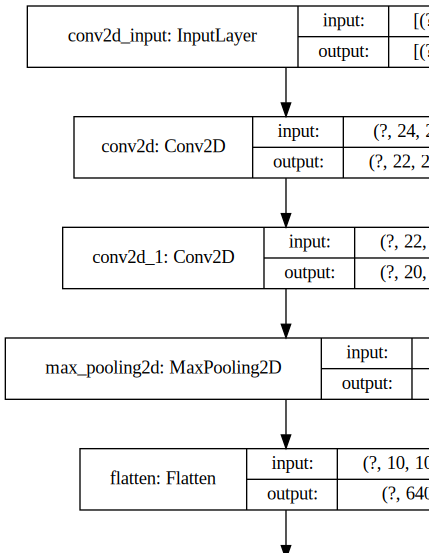

In [6]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

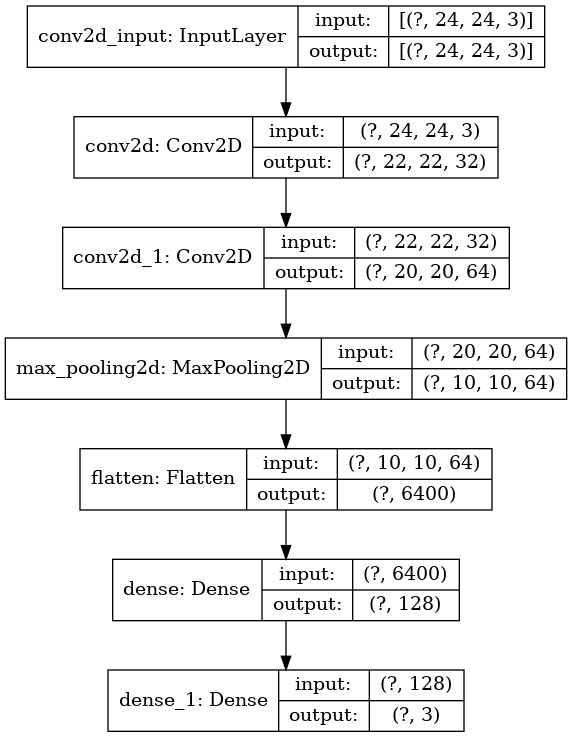

In [7]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'


### 모델 학습과정 설정하기

In [8]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
15/15 [==============================] - 0s 20ms/step - loss: 0.7912 - accuracy: 0.6222 - val_loss: 0.4611 - val_accuracy: 0.8000
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1834 - accuracy: 0.9333 - val_loss: 0.2207 - val_accuracy: 0.8667
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.2367 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9778 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 5.4462e-04 

### 모델 평가하기

In [10]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
Instructions for updating:
Please use Model.evaluate, which supports generators.
accuracy: 100.00%


In [11]:
scores[0], scores[1]

(0.05134621635079384, 1.0)

### 모델 사용하기

In [12]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
Instructions for updating:
Please use Model.predict, which supports generators.
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.422 0.469 0.109]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.010 0.990]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]]
